<a href="https://colab.research.google.com/github/JinyangWang27/singleChannel2DV/blob/main/singleChannel2DV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
#@title ### Install, import dependencies 
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
plt.rc('axes', grid=True) 

In [128]:
#@markdown ####**Geometry Settings:**
n_grid = 100 #@param {type: 'number'}
channel_length = 250000 #@param {type: 'number'}  
x = np.linspace(0, channel_length, nx_grid)
depth = 10  #@param {type: 'number'}
z = np.linspace(-depth, 0, n_grid)
X, Z = np.meshgrid(x, z)
width_profile = 'constant' #@param ['constant','exponential'] 
width_at_sea = 500 #@param {type: 'number'}
convergence_length = 1e5  #@param {type: 'number'}
if width_profile ==  'constant':
  convergence_length = np.inf
B = width_at_sea * np.exp((x - channel_length) / convergence_length)


  

In [121]:
g = 9.81
omega = 2 * pi / 44700
Av = 0.01 #@param {type: 'number'}
sf = 0.01  #@param {type: 'number'} #s

In [125]:
#@markdown ####**Force Settings:**
external_M2_ampitude = 1 #@param {type: 'number'}
external_M2_phase_rad = 0 #@param {type: 'number'}
M2 = external_M2_ampitude * np.exp(1j * external_M2_phase_rad)

In [140]:
H = depth
lc = convergence_length
gamma = np.sqrt(-1j * omega / Av)
beta = sf / (sf * np.cosh(gamma * H) + Av * gamma * np.sinh(gamma * H))
d0 = np.sqrt(
    (.5 / lc)**2 - omega**2 / (g * H * (1 - beta * np.sinh(gamma * H) / gamma / H))
)
# C1, C2 = np.linalg.solve(
#     [[d0, -d0], [np.exp((d0 - .5/lc) * channel_length), np.exp((-d0 - .5/lc) * channel_length)]], 
#     [0, M2])
soln = np.linalg.solve(
    [[d0, -d0], [np.exp((d0 - .5/lc) * channel_length), np.exp((-d0 - .5/lc) * channel_length)]], 
    [0, M2])

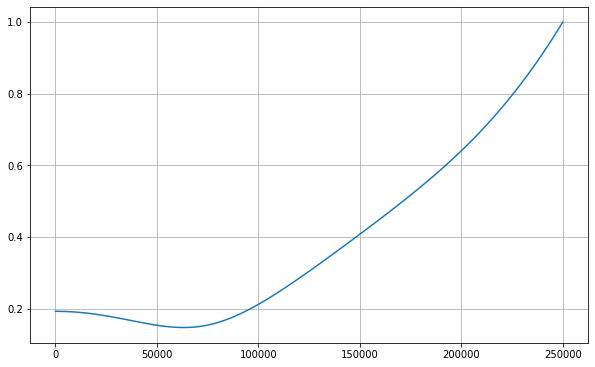

In [130]:
eta = np.exp(-.5 / lc * x) * (soln[0] * np.exp(d0 * x) + soln[1] * np.exp(-d0 * x)) 
plt.figure(figsize=(10, 6.18))
plt.plot(x, np.abs(eta))

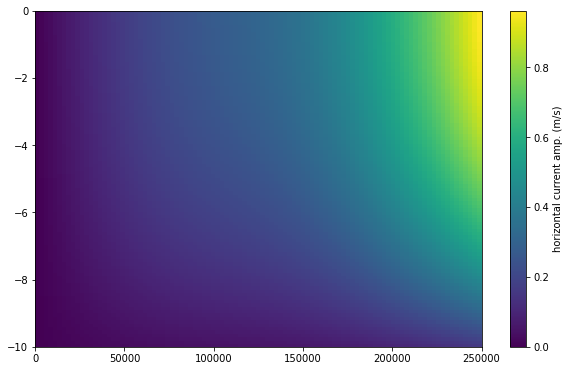

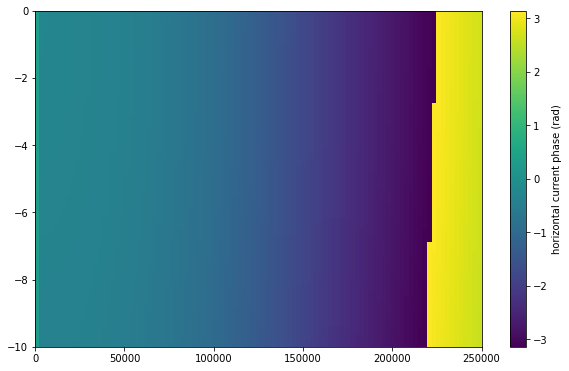

In [138]:
u = -1j * g / omega * (1 - beta * np.cosh(gamma * Z)) * np.exp(-.5 / lc * X) * (d0 * soln[0] * np.exp(d0 * X) - d0 * soln[1] * np.exp(-d0 * X)) 
plt.figure(figsize=(10, 6.18))
contour_u = plt.pcolor(X, Z, np.abs(u))
cbar = plt.colorbar(contour_u)
cbar.set_label('horizontal current amp. (m/s)')

plt.figure(figsize=(10, 6.18))
contour_u = plt.pcolor(X, Z, np.angle(u))
cbar = plt.colorbar(contour_u)
cbar.set_label('horizontal current phase (rad)')